## TAREA 4 - ANÁLISIS DE DATOS / UNAD
# K-means
- Estudiante: Pablo Andrés Suarez Rocha

## Importar librerías

In [122]:
#IMPORTAMOS LIBRERIAS 
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [124]:
#CARGAMOS EL DATASET
info = pd.read_csv('C:/Users/ANDRES_S/Desktop/Andrés/Octavo semestre UNAD/ANALISIS  DE DATOS/Tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv')
info.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análisis exploratorio de los datos.

In [127]:
# Descripción de los datos
info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

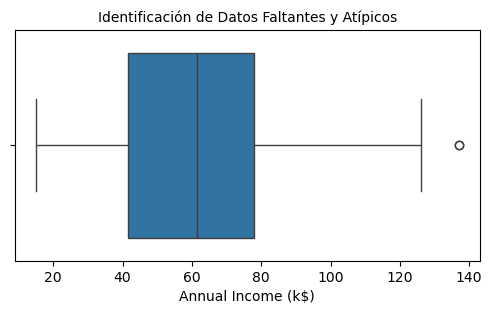

In [128]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [129]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age: ",info['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ",info['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",info['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


EN ESTE CASO NO HAY QUE RELLENAR VALORES FALTANTES.

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

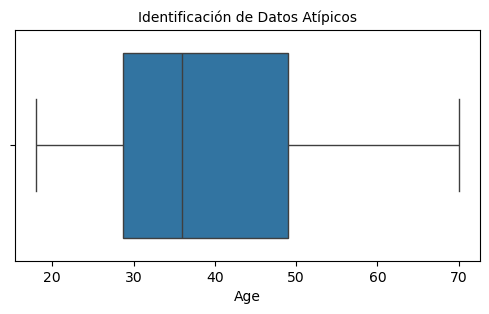

In [134]:
#IDENTIFICAR VALORES ATIPICOS AGE

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [135]:
#CANTIDAD DE DATOS ATIPICOS Age

nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((info['Age']<nivel_minimo)|(info['Age']>nivel_maximo)).sum()
print(" - El total de datos atípicos es {}".format(Total_Atipicos))

 - El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

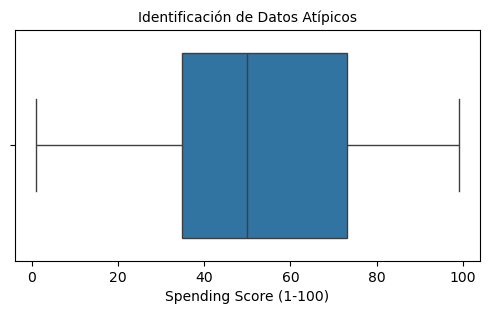

In [136]:
#IDENTIFICAR VALORES ATIPICOS  Spending Score (1-100).

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [138]:
#CANTIDAD DE DATOS ATIPICOS

nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((info['Spending Score (1-100)']<nivel_minimo)|(info['Spending Score (1-100)']>nivel_maximo)).sum()
print(" - El total de datos atípicos es {}".format(Total_Atipicos))

 - El total de datos atípicos es 0


EN ESTE  CASO NO HAY VALORES ATIPICOS PARA FILTRAR.


In [141]:
#REVISIÓN DE DATOS
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


OBSERVAMOS QUE NO TENEMOS VALORES FALTANTES YA QUE TODAS LAS COLUMNAS CUENTAN CON 200 DATOS, DE IGUAL MANERA NO HAY VALORES ATIPICOS, POR LO QUE PODEMOS EMPEZAR A ENTRENAR EL MODELO.

## Selección de caracteristicas para entrenamiento del modelo.
Para este dataset, eliminaremos las columnas de "CustomerID" y "Gender" ya que son valores que no son relevantes para realizar la agrupación.

In [146]:
# FILTRAR COLUMNAS

info = info[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [147]:
info.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


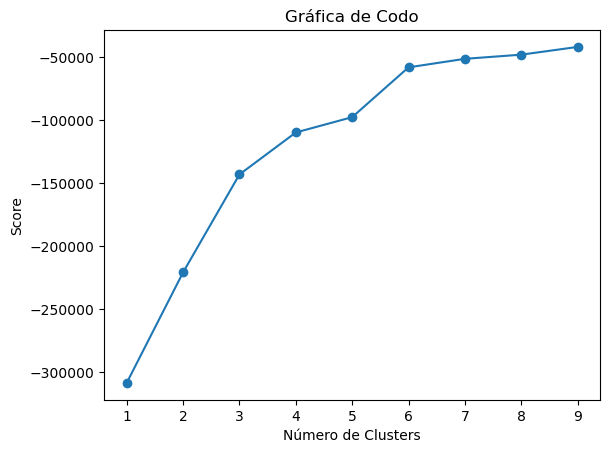

In [148]:
# GRÁFICA DE CODO PARA IDENTIFICAR VALOR DE LOS CLUSTERS (K)

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(info).score(info) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

## Entrenar el modelo
- **Preparación de datos.**

In [153]:
# ESTANDARIZAR LOS DATOS
scaler = StandardScaler()
scaled_data = scaler.fit_transform(info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])

- **Visualización Dendrograma**
  

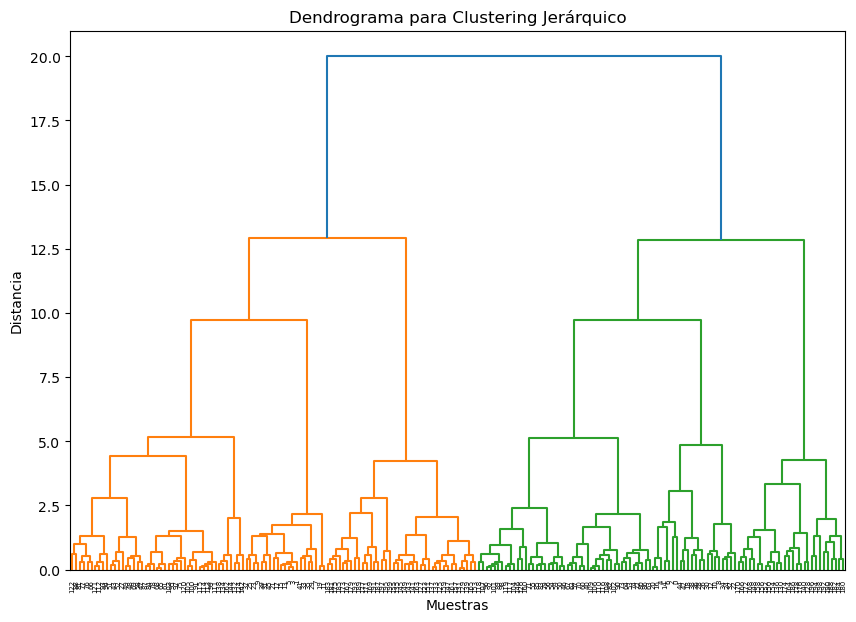

In [156]:
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos


linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [158]:
info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']] = info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].fillna(info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(info[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.127729006104786


- **Gráfico de Dispersión para Visualización de Clusters**

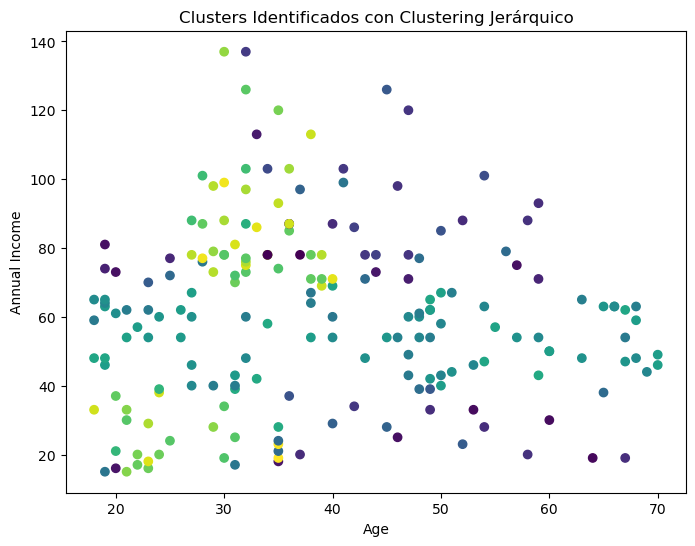

In [174]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=6)  # Ajustar el número de clusters
info['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(info['Age'], info['Annual Income (k$)'], c=info['Spending Score (1-100)'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

- **Grafico de silueta**

Silhouette Score: 0.4201169558789579


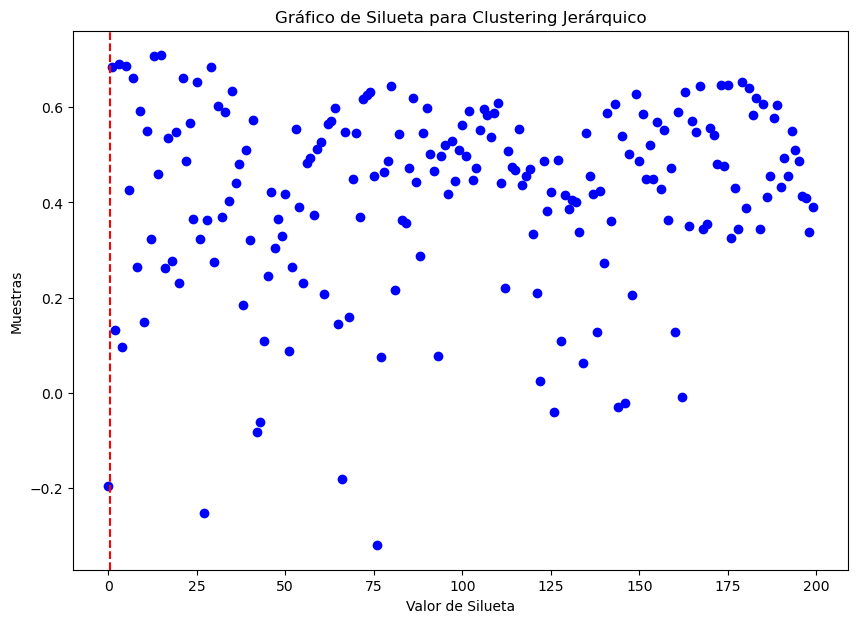

In [177]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## CONCLUSIONES
- Un valor de 0.321 de Coeficiente de Silhouette indica que los clusters no están tan bien separados ni son tan coherentes. Aunque los puntos dentro de cada cluster están algo agrupados, hay cierta superposición entre los clusters, lo que podría sugerir que los grupos podrían no ser perfectamente distintos además de mostrar gran dispersión en los gráficos.
- El índice de Calinski-Harabasz es de 88.1 es bastante bajo, lo que indica es que los datos no están muy agrupados, aunque también hay que tener en cuenta que con Bases de datos con pocos datos los valores de este indice son relativamente bajos.
- El indice de Davies-Bouldin de 1.12 indica que los clusters no son perfectamente separados, pero tampoco son excesivamente dispersos, lo que se puede decir un termino medio.
- Como conclusión general, podemos ver que no hay un grupo especifico grande de personas con las que podamos contar, por el contrario contamos con varios grupos, en este caso y el valor que mejores resultados daba son los 6 clusters, por lo que contamos con 6 grupos con diferentes salarios y edades.